In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

!pip install fasteda -q

from fasteda import fast_eda

## Globals

In [2]:
FEATURES = ["volatility", "trend"]
TARGET = ["profit"]
INSTANCES = 10000

In [3]:
m = INSTANCES
X_1 = np.linspace(-5, 5, m)
X_2 = np.linspace(-2, 2, m)
y = 5*X_1 + 3*X_2 + 3 + np.random.randn(m)

print("shape 1", X_1.shape, X_2.shape, y.shape)

X_1, X_2 = X_1.reshape(-1, 1), X_2.reshape(-1, 1)

print("Shape 2", X_1.shape, X_2.shape, y.shape)

X = np.hstack((X_1, X_2))
X.shape

y = y.reshape(-1,1)
X.shape , y.shape

shape 1 (10000,) (10000,) (10000,)
Shape 2 (10000, 1) (10000, 1) (10000,)


((10000, 2), (10000, 1))

In [4]:
data = np.hstack((X, y))

## EDA

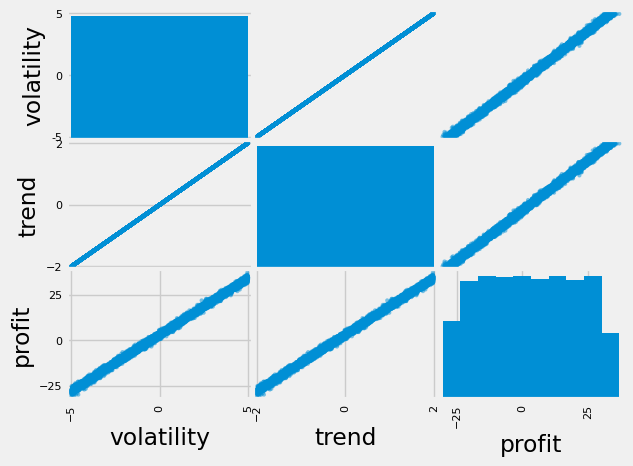

In [5]:
df=pd.DataFrame(data, columns=["volatility","trend", "profit"])
plt_obj = scatter_matrix(df)

## Define the Problem

Given the volatility and the trend, try to predict the profits

## Prepare Data

In [6]:
df.head()

,volatility,trend,profit
0,-5.000,-2.0000,-28.002010
1,-4.999,-1.9996,-29.041418
2,-4.998,-1.9992,-27.402081
3,-4.997,-1.9988,-29.438299
4,-4.996,-1.9984,-27.734660


## Split train/test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = np.array(df[FEATURES])
y = np.array(df[TARGET])

### Split Train/Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
y_train = y_train.reshape(-1)  # make y_train a column vector
y_test = y_test.reshape(-1,1)  # make y_train a column vector
assert X_train.shape[0] == int(INSTANCES*.6)
assert X_test.shape[0] == int(INSTANCES*.4)

In [13]:
# check that data was shuffled apending column y_train to X-train
np.append( X_train, y_train.reshape(-1,1), axis=1)[0:10]

array([[ 4.76197620e+00,  1.90479048e+00,  3.21015465e+01],
       [-1.84068407e+00, -7.36273627e-01, -8.28435238e+00],
       [-3.51085109e+00, -1.40434043e+00, -1.99249893e+01],
       [-2.01270127e+00, -8.05080508e-01, -1.10123130e+01],
       [-4.18791879e+00, -1.67516752e+00, -2.31560399e+01],
       [-3.11781178e+00, -1.24712471e+00, -1.63131637e+01],
       [ 4.26792679e+00,  1.70717072e+00,  3.10913939e+01],
       [-6.35063506e-02, -2.54025403e-02,  4.03853698e+00],
       [ 4.93599360e+00,  1.97439744e+00,  3.29393306e+01],
       [-3.05980598e+00, -1.22392239e+00, -1.62683286e+01]])

### Add bias term to X_train

The bias term is added to train and test?

In [14]:
bias = np.ones( (X_train.shape[0], 1))
X_train_bias = np.append(bias, X_train, axis=1)

In [15]:
X_train_bias[0:10]

array([[ 1.        ,  4.7619762 ,  1.90479048],
       [ 1.        , -1.84068407, -0.73627363],
       [ 1.        , -3.51085109, -1.40434043],
       [ 1.        , -2.01270127, -0.80508051],
       [ 1.        , -4.18791879, -1.67516752],
       [ 1.        , -3.11781178, -1.24712471],
       [ 1.        ,  4.26792679,  1.70717072],
       [ 1.        , -0.06350635, -0.02540254],
       [ 1.        ,  4.9359936 ,  1.97439744],
       [ 1.        , -3.05980598, -1.22392239]])

### Create parameter matrix

In [61]:
theta = np.random.randn(1, X_train_bias.shape[1])
theta

array([[-0.47869018, -0.37603288, -0.10985076]])

In [62]:
print("Shape of X_train_bias", X_train_bias.shape)
print("Shape of theta", theta.shape)

Shape of X_train_bias (6000, 3)
Shape of theta (1, 3)


## Train

Gradient Calculation

$ \frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $

Here,
- $\frac{\partial J(w)}{\partial w_j}$ represents the partial derivative of the cost function $ J(w)$ with respect to the weight $ w_j $.
- $m$ is the number of training examples.
- $ h_w(x^{(i)}) $ is the predicted output of the model for the input $ x^{(i)} $ using parameters $ w $.
- $ y^{(i)} $ is the actual output for the input $ x^{(i)} $.
- $ x_j^{(i)} $ is the value of feature $ j $ in training example $ i $.

The gradient of the cost function with respect to all weights forms the gradient vector $ \nabla J(w) = [\frac{\partial J(w)}{\partial w_0}, \frac{\partial J(w)}{\partial w_1}, ..., \frac{\partial J(w)}{\partial w_n}]^T $.

In the context of gradient descent, the weights are updated iteratively using the gradient:

$ w := w - \alpha \cdot \nabla J(w) $

where $ \alpha $ is the learning rate that controls the size of the step taken in the direction of the negative gradient.

In [90]:
# Gradient Descent Algorithm Looped Version

n = X_train_bias.shape[1]  # number of features
m = X_train_bias.shape[0]  # number of instances
alpha = 0.1  # learning rate
theta = np.random.randn(1, X_train_bias.shape[1])

for epoch in range(1000):

    sum_accum = 0
    partial_J_i = np.zeros(n)
    for j in range(n):
        for i in range(m):
            h_theta_i = np.matmul(theta, X_train_bias[i])  #  predicted output
            sum_accum += (h_theta_i - y[i])*X_train_bias[i][j]  # diff. between predicted output times the feature j for the sample i
        gradient_j = (1/m)*sum_accum
        partial_J_i[j] = gradient_j[0]
    gradient_norm = np.linalg.norm(partial_J_i)
    if epoch%10 == 0:
        print(f"Epoch {epoch} gradient norm {gradient_norm}")
    if gradient_norm < 10**-9:
        break
    theta = theta - alpha*partial_J_i
print("Theta", theta)
    
    

Epoch 0 gradient norm 26.501341831378326
Epoch 10 gradient norm 4.044584338804426
Epoch 20 gradient norm 1.4188128745239685
Epoch 30 gradient norm 0.49770407733828304
Epoch 40 gradient norm 0.17458916041057396
Epoch 50 gradient norm 0.061243972715428155
Epoch 60 gradient norm 0.021483717460769575
Epoch 70 gradient norm 0.0075362536992425655
Epoch 80 gradient norm 0.002643635577649599
Epoch 90 gradient norm 0.0009273585187583481
Epoch 100 gradient norm 0.0003253072509508615
Epoch 110 gradient norm 0.00011411423455638623
Epoch 120 gradient norm 4.003002851121002e-05
Epoch 130 gradient norm 1.404209727121143e-05
Epoch 140 gradient norm 4.925814514984858e-06
Epoch 150 gradient norm 1.7279219885755332e-06
Epoch 160 gradient norm 6.061361968000179e-07
Epoch 170 gradient norm 2.1262596152163355e-07
Epoch 180 gradient norm 7.458688381109599e-08
Epoch 190 gradient norm 2.616425444055627e-08
Epoch 200 gradient norm 9.178132653688355e-09
Epoch 210 gradient norm 3.219585805603514e-09
Epoch 220 gra

In [69]:
partial_J_i = np.zeros(n)
partial_J_i

array([0., 0., 0.])

In [72]:
partial_J_i[2] = 1
partial_J_i

array([1., 0., 1.])

In [ ]:
np.dot(X_train_bias, theta[0]) - y_train

In [ ]:
theta[0]*X_train_bias[0]

In [ ]:
print("Shape X_train_bias", X_train_bias.shape)
m = X_train_bias.shape[0]
theta_this = np.matmul( (2/m)*(X_train_bias.T), np.dot(X_train_bias, theta.T) - y_train)  # calculate gradient
theta_this

In [ ]:
fact_1 = ((2/m)*(X_train_bias.T))
print("Shape fact_1", fact_1.shape)

In [ ]:
fact_2 = (np.dot(X_train_bias, theta.T) - y_train)
print("Shape fact_2", fact_2.shape)

In [ ]:
y_train

In [ ]:
y_train.reshape(-1,1)